In [729]:
import numpy as np
import matplotlib.pyplot as plt

In [730]:
import os
import shutil
import time

In [731]:
dir_save = "../.saves/" + "two kinks shape changing C T = 100/" 

# Plot space average of u(t) for all experiments in the folder

In [732]:
N = 10000000
dt = 0.008
tmax = 5000
imax = int(tmax/dt)

Text(0.5, 1.0, 'Crank-Nicolson vary T,dt Cave=0 u0=1 $T/dt = 10$')

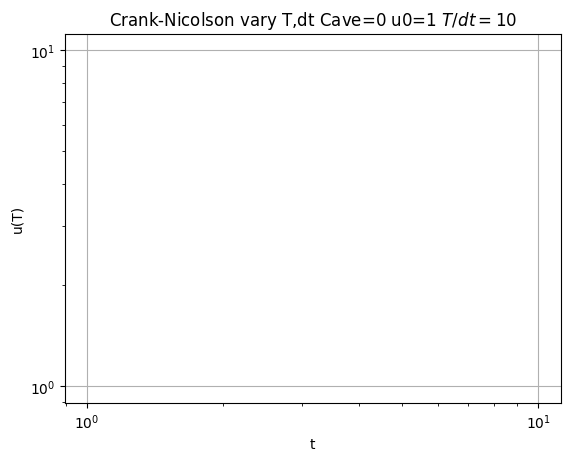

In [733]:
# Create plot object
fig, ax = plt.subplots()
ax.set_xscale("log")
ax.set_xlabel("t")
ax.set_ylabel("u(T)")
ax.set_yscale("log")
ax.grid()
ax.set_title("Crank-Nicolson vary T,dt Cave=0 u0=1 $T/dt = 10$")

../.saves/two kinks shape changing C T = 100/1708963011295
../.saves/two kinks shape changing C T = 100/1708963005548
../.saves/two kinks shape changing C T = 100/1708962989455


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


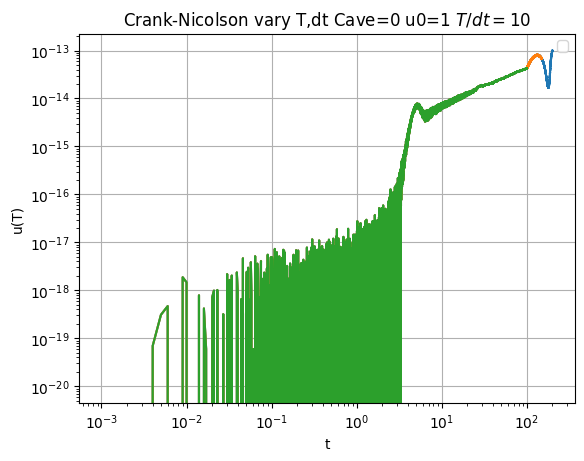

In [734]:
# Get all the simulations in the selected folder
for folder in sorted(os.listdir(dir_save), reverse=True):
    dir = dir_save + folder
    print(dir)
    # Get label of the curve
    f = open(dir + "/label.dat", "r")
    label = f.readline().strip('\n')
    f.close()

    f = open(dir + "/fileAveout.dat", "r")
    x = np.zeros(N)
    y = np.zeros(N)
    i = 0
    for row in f:
        a, b = row.split(" ")
        x[i] = float(a)
        y[i] = float(b)
        i = i + 1
        if i > imax:
            break
    ax.plot(x[0:min(i,imax)], y[0:min(i,imax)],label=label)
ax.legend()
fig

# Plot the final state u(x,tmax) for any experiment in the folder

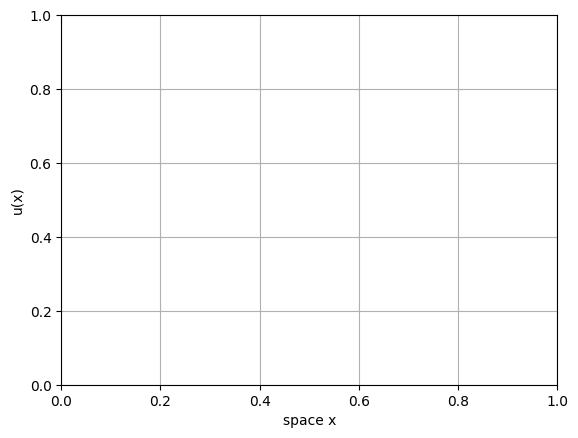

In [735]:
# Create plot object
fig, ax = plt.subplots()
ax.set_xscale("linear")
ax.set_xlabel("space x")
ax.set_ylabel("u(x)")
ax.set_yscale("linear")
ax.grid()

../.saves/two kinks shape changing C T = 100/1708962989455
-0.500000
C = 1.0
460 560
../.saves/two kinks shape changing C T = 100/1708963005548
50.000000
C = 1.0000000000000004
460 560
../.saves/two kinks shape changing C T = 100/1708963011295
50.000000
C = 0.9999999999999996
460 560


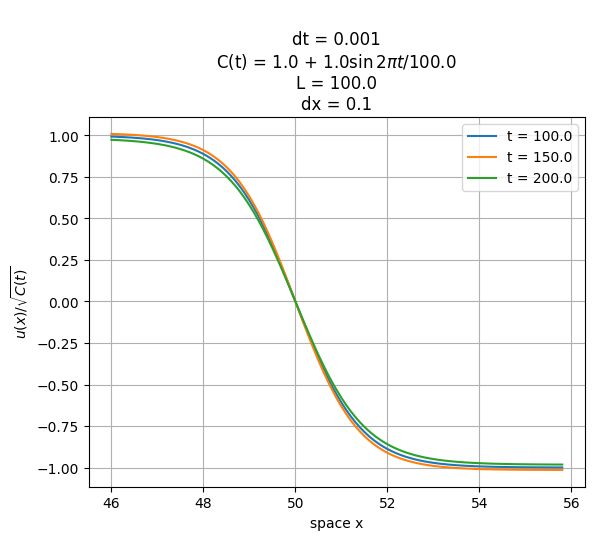

In [736]:
# Get all the simulations in the selected folder
xmin = 46
xmax = 56

for folder in sorted(os.listdir(dir_save), reverse=False):
    dir = dir_save + folder
    print(dir)

    f = open(dir + "/tdgl_result.dat", "r")
    N = 1000000000
    x = np.zeros(N)
    y = np.zeros(N)
    i = 0
    for row in f:
        if i != 0:
            a, b = row.split(" ")
            x[i-1] = float(a)
            y[i-1] = float(b)
        else:
            N, tmax, dx, dt, seed, A, Thalf, Cave = row.split(" ")
            N = int(N)
            tmax = float(tmax)
            dx = float(dx)
            L = N*dx
            dt = float(dt)
            A = float(A)
            print(Thalf)
            T = 2*float(Thalf)
            Cave = float(Cave)
        i = i + 1

    f.close()
    
    # Get label of the curve
    f = open(dir + "/label.dat", "r")
    label = f.readline().strip('\n')
    f.close()
    # Custom label
    labell = label
    # Label with the state's time
    state_time = tmax 
    state_time = round(state_time, 3)
    labell = "t = " + str(state_time) # Label with time (uncomment for custom label)
    
    # Get last value of C (C at the time of the plotted state)
    f = open(dir + "/fileCout.dat", "r")
    for row in f:
        tt, C = row.split(" ") #Only the last row is interesting
    C = float(C)
    print("C = "+str(C))
    if T < 0:
        labell = labell + " (initial)"

    imin = int(xmin/dx)
    imax = int(xmax/dx)
    if xmin < 0:
        imin = 0
    if xmax > L or xmax < 0:
        imax = i
    print(imin, imax)
    ax.plot(x[imin:imax-1], y[imin:imax-1]/np.sqrt(C), label = labell)
    
#eps = 0.5
#plt.ylim(-1-eps,1+eps)

label = ""
#u0 = 1
#label = label + "$u_0 = " + str(u0) + "$"
label= label + "\ndt = " + str(dt)
if T > 0:
    label = label + "\nC(t) = " + str(Cave) + " + " + str(A) + "$\sin{2\pi t/" + str(T) + "}$"
else:
    label = label + "\nC = " + str(Cave)
label = label + "\nL = " + str(round(N*dx,3))
label = label + "\ndx = " + str(round(dx,3))
#label = "dt = " + str(dt) 
#if float(T) > 0:
#label = label + "; T = " + str(T) + "; A = " + str(A)
#else:
#label = label + "; C = " + str(A) + " cost"

ax.set_title(label)
ax.set_xlabel("space x")
ax.set_ylabel("$u(x) / \sqrt{C(t)}$")



ax.legend()
fig

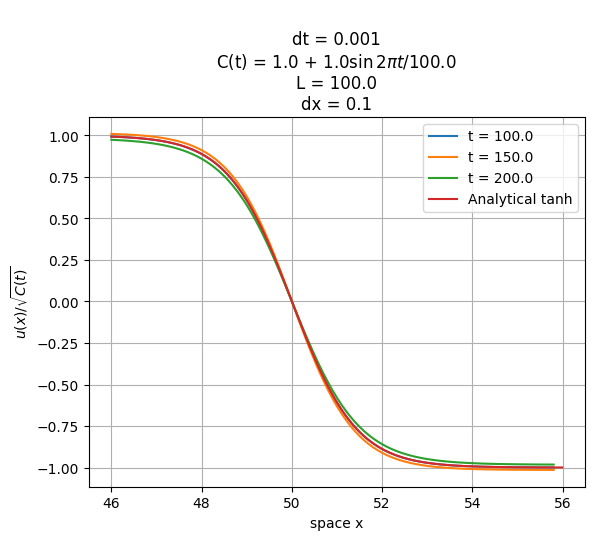

In [737]:
# Plot analytical solution
Num = 1000
x = np.arange(0,Num)/Num*(xmax-xmin)+xmin*np.ones(Num)
y = np.zeros(Num)
j = 0
xc = 50 # tanh center
for xi in x:
    y[j] = -np.tanh((x[j]-xc)/np.sqrt(2))
    j = j + 1
ax.plot(x,y,label="Analytical tanh")
ax.legend()
fig

In [738]:
x

array([46.  , 46.01, 46.02, 46.03, 46.04, 46.05, 46.06, 46.07, 46.08,
       46.09, 46.1 , 46.11, 46.12, 46.13, 46.14, 46.15, 46.16, 46.17,
       46.18, 46.19, 46.2 , 46.21, 46.22, 46.23, 46.24, 46.25, 46.26,
       46.27, 46.28, 46.29, 46.3 , 46.31, 46.32, 46.33, 46.34, 46.35,
       46.36, 46.37, 46.38, 46.39, 46.4 , 46.41, 46.42, 46.43, 46.44,
       46.45, 46.46, 46.47, 46.48, 46.49, 46.5 , 46.51, 46.52, 46.53,
       46.54, 46.55, 46.56, 46.57, 46.58, 46.59, 46.6 , 46.61, 46.62,
       46.63, 46.64, 46.65, 46.66, 46.67, 46.68, 46.69, 46.7 , 46.71,
       46.72, 46.73, 46.74, 46.75, 46.76, 46.77, 46.78, 46.79, 46.8 ,
       46.81, 46.82, 46.83, 46.84, 46.85, 46.86, 46.87, 46.88, 46.89,
       46.9 , 46.91, 46.92, 46.93, 46.94, 46.95, 46.96, 46.97, 46.98,
       46.99, 47.  , 47.01, 47.02, 47.03, 47.04, 47.05, 47.06, 47.07,
       47.08, 47.09, 47.1 , 47.11, 47.12, 47.13, 47.14, 47.15, 47.16,
       47.17, 47.18, 47.19, 47.2 , 47.21, 47.22, 47.23, 47.24, 47.25,
       47.26, 47.27,

In [739]:
np.tanh()

TypeError: tanh() takes from 1 to 2 positional arguments but 0 were given